In [1]:
import warnings
warnings.filterwarnings(action='ignore')
%config Completer.use_jedi = False

지역적 선형 임베딩(Locally Linear Embedding, LLE)  
각 데이터 포인트의 이웃 데이터 중 k개 이웃 데이터를 선정하고 데이터 자신과 k개의 이웃 데이터를 하나의 덩어리로 가정하고 데이터를 재구성한다. 기존 데이터 자신의 이웃 데이터를 기준으로 재구성하는 방법으로 해당 데이터 자체보다 주변의 이웃 데이터 들이 중요한다.

LLE 알고리즘을 활용해 와인 종류를 구분하는 모델을 생성해본다.

In [2]:
# 데이터 불러오기
from sklearn import datasets # 사이킷런이 제공하는 데이터셋을 사용하기 위해 import 한다.
raw_wine = datasets.load_wine() # 와인 데이터를 불러온다.

In [3]:
# 피쳐, 타겟 데이터 저장
X = raw_wine.data # 피쳐 데이터를 저장한다.
y = raw_wine.target # 타겟 데이터를 저장한다.
X.shape

(178, 13)

In [4]:
# 트레이닝, 테스트 데이터 분할
from sklearn.model_selection import train_test_split # 트레이닝, 테스트 데이터 분할을 위해 import 한다.
X_tn, X_te, y_tn, y_te = train_test_split(X, y, random_state=1) # 트레이닝 데이터와 테스트 데이터로 분할한다.
print(X_tn.shape, y_tn.shape, X_te.shape, y_te.shape)

(133, 13) (133,) (45, 13) (45,)


In [5]:
# 데이터 표준화
from sklearn.preprocessing import StandardScaler # 데이터 표준화를 위해 import 한다.
std_scale = StandardScaler() # 표준화 스케일러 객체를 만든다.
# 표준화는 트레이닝 데이터를 기반으로 실행하므로 트레이닝 피쳐 데이터 X_tn을 표준화 스케일러에 적합시킨다.
X_tn_std = std_scale.fit_transform(X_tn) # 트레이닝 데이터를 적합 후 표준화 한다.
X_te_std = std_scale.transform(X_te) # 테스트 데이터를 표준화 한다.

In [8]:
# LLE를 통한 차원 축소
from sklearn.manifold import LocallyLinearEmbedding # LLE 알고리즘을 사용하기 위해 import 한다.
# LLE 객체를 생성할 때 n_components 속성에 축소할 차원의 크기를 설정한다. 기본값은 2이다.
lle = LocallyLinearEmbedding(n_components=2) # LLE 모델을 만든다.
# LLE를 실행할 때 트레이닝 데이터를 기반으로 실행하므로 표준화된 트레이닝 피쳐 데이터 X_tn_std를 LLE 모델에 
# 적합시킨 후 트레이닝 데이터의 차원을 축소한다.
X_tn_lle = lle.fit_transform(X_tn_std, y_tn)
X_te_lle = lle.transform(X_te_std) # 적합된 LLE 모델을 바탕으로 표준화된 테스트 데이터의 차원을 축소한다.

In [9]:
# 차원 축소 확인
print(X_tn_std.shape, X_tn_lle.shape, X_te_std.shape, X_te_lle.shape)

(133, 13) (133, 2) (45, 13) (45, 2)


In [10]:
# LLE 임베딩 벡터 확인
print(lle.embedding_)

[[ 0.10370077  0.03797149]
 [ 0.07222626  0.00764776]
 [ 0.11291288  0.05930921]
 [ 0.11560401  0.06205209]
 [ 0.11854756  0.06719633]
 [-0.02664269 -0.13181186]
 [-0.10501921  0.07537654]
 [-0.10326081  0.07047313]
 [ 0.10811266  0.04689056]
 [-0.04377827 -0.09418701]
 [ 0.0712414   0.01801874]
 [ 0.13033709  0.08810276]
 [ 0.02991311 -0.04069974]
 [-0.07898669  0.01497572]
 [ 0.03473125 -0.05744147]
 [ 0.01943026 -0.04529514]
 [ 0.11959649  0.07007802]
 [-0.10317351  0.07114343]
 [-0.02752016 -0.14962908]
 [-0.1164511   0.10200801]
 [ 0.10508563  0.04186687]
 [-0.01462819 -0.16313682]
 [ 0.06810266 -0.0169578 ]
 [-0.01732533 -0.16242923]
 [ 0.11454199  0.05901053]
 [-0.09625792  0.05485706]
 [-0.11013016  0.08772677]
 [-0.10843424  0.08356562]
 [-0.10619192  0.07755468]
 [-0.08729218  0.04167607]
 [-0.03682447 -0.05761368]
 [ 0.09367018  0.02624216]
 [-0.10295085  0.06762962]
 [ 0.11999055  0.07023365]
 [-0.06361883 -0.0199435 ]
 [-0.11550832  0.09903396]
 [ 0.11279934  0.05534145]
 

차원 축소된 데이터 시각화

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
lle_columns = ['lle_comp1', 'lle_comp2']
X_tn_lle_df = pd.DataFrame(X_tn_lle, columns=lle_columns)
X_tn_lle_df['target'] = y_tn
X_tn_lle_df

,lle_comp1,lle_comp2,target
0,0.103701,0.037971,0
1,0.072226,0.007648,1
2,0.112913,0.059309,0
3,0.115604,0.062052,0
4,0.118548,0.067196,0
...,...,...,...
128,-0.122468,0.117589,2
129,-0.106745,0.077409,2
130,0.001631,-0.119052,1
131,-0.111992,0.091476,2


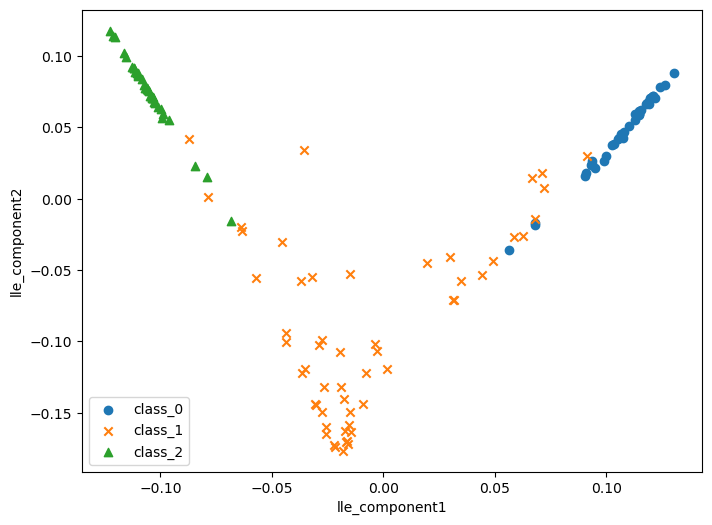

In [12]:
plt.figure(figsize=[8, 6])
markers = ['o', 'x', '^']

for index, marker in enumerate(markers):
    df_index = X_tn_lle_df[X_tn_lle_df.target == index]
    target_index = raw_wine.target_names[index]
    X1 = df_index.lle_comp1
    X2 = df_index.lle_comp2
    plt.scatter(X1, X2, marker=marker, label=target_index)

plt.xlabel('lle_component1')
plt.ylabel('lle_component2')
plt.legend()
plt.show()

LLE 적용 전 데이터 학습

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
clf_rf = RandomForestClassifier(max_depth=2, random_state=0)
clf_rf.fit(X_tn_std, y_tn)
pred_rf = clf_rf.predict(X_te_std)
accuracy = accuracy_score(y_te, pred_rf)
print(accuracy)

0.9777777777777777


LLE 적용 후 데이터 학습

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
clf_rf_lle = RandomForestClassifier(max_depth=2, random_state=0)
clf_rf_lle.fit(X_tn_lle, y_tn)
pred_rf_lle = clf_rf_lle.predict(X_te_lle)
accuracy = accuracy_score(y_te, pred_rf_lle)
print(accuracy)

0.9333333333333333
